A Tabela 1 descreve a população brasileira conforme dados oficiais do instituto brasileiro de geografia e estatística (IBGE):

Ano       | População
--------- | ------
1900      | 17.438.434
1920      | 30.635.605
1940      | 41.236.315
1950      | 51.944.397
1960      | 70.992.343
1970      | 94.508.583
1980      | 121.150.573
1991      | 146.917.459
2000      | 169.590.693
2010      | 190.755.799:

Tabela 1: População Brasileira







In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Questão 1

Determine o polinômio que interpola os pontos tabelados.

In [2]:
n = 9
x = np.array([1900, 1920, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2010])
y = np.array([17438434, 30635605, 41236315, 51944397, 70992343, 94508583, 121150573, 146917459, 169590693, 190755799])

## Construindo Matrix

Decidi aplicar o Método de Newton e comecei formando a matriz.

In [3]:
A = np.zeros((n+1,n+1))

In [4]:
A[:,0] = np.ones_like(A[:,0])

In [5]:
for j in range(1, n+1):
    A[j:,j] = A[j:,j-1] * (x[j:] - x[j-1])

In [6]:
A

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.00000000e+01, 8.00000000e+02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00000000e+01, 1.50000000e+03, 1.50000000e+04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.00000000e+01, 2.40000000e+03, 4.80000000e+04,
        4.80000000e+05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 7.00000000e+01, 3.50000000e+03, 1.05000000e+05,
   

## Solução do Sistema

Então, resolvi o sistema $\boldsymbol{A} \alpha = \boldsymbol{y}$ para obter $\alpha$.

In [7]:
alpha = np.linalg.solve(A, y)
alpha

array([ 1.74384340e+07,  6.59858550e+05, -3.24557625e+03,  4.25426658e+02,
        2.77354042e+00, -3.93079363e-01,  1.22634136e-02, -3.15087626e-04,
        9.07052433e-06, -2.61105123e-07])

In [14]:
x

array([1900, 1920, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2010])

In [8]:
def Newton(t, alpha):
    m = np.empty((10, t.shape[0]))
    m[0] = np.ones_like(t)
    m[1] = (t - x[0])
    for j in range(2, 10):
        m[j] = m[j-1] * (t - x[j-1])
    return np.dot(alpha, m)

Agora, o polinomio é determinado por `Newton(t, alpha)`.

Ou seja:

$p_9(x) = 1.74\mathrm{e}{+07}  + 6.60\mathrm{e}{+05} \times (x - 1900) - 3.25\mathrm{e}{+03} \times (x - 1900) \times (x - 1920) + 4.25\mathrm{e}{+02} \times (x - 1900) \times (x - 1920) \times (x - 1940) + 2.77\mathrm{e}{+00} \times (x - 1900) \times (x - 1920) \times (x - 1940) \times (x - 1950) - 3.93\mathrm{e}{-01} \times (x - 1900) \times (x - 1920) \times (x - 1940) \times (x - 1950) \times (x - 1960) + 1.23\mathrm{e}{-02} \times (x - 1900) \times (x - 1920) \times (x - 1940) \times (x - 1950) \times (x - 1960) \times (x - 1970) - 3.15\mathrm{e}{-04} \times (x - 1900) \times (x - 1920) \times (x - 1940) \times (x - 1950) \times (x - 1960) \times (x - 1970) \times (x - 1980) + 9.07\mathrm{e}{-06} \times (x - 1900) \times (x - 1920) \times (x - 1940) \times (x - 1950) \times (x - 1960) \times (x - 1970) \times (x - 1980) \times (x - 1991) - 2.61\mathrm{e}{-07} \times (x - 1900) \times (x - 1920) \times (x - 1940) \times (x - 1950) \times (x - 1960) \times (x - 1970) \times (x - 1980) \times (x - 1991) \times (x - 2000)$

## Tabela de Diferenças Divididas

Também comparei o resultado de $\alpha$ com o resultado obtido por meio da Tabela de Diferenças Divididas.

In [9]:
DD = np.zeros((n+1, n+1))

In [10]:
DD[:,0] = y

In [11]:
for j in range(1, n+2):
    for i in range(0, n+1 - j):
        DD[i,j] = (DD[i+1,j-1] - DD[i,j-1]) / (x[i + j] - x[i])

In [12]:
DD

array([[ 1.74384340e+07,  6.59858550e+05, -3.24557625e+03,
         4.25426658e+02,  2.77354042e+00, -3.93079363e-01,
         1.22634136e-02, -3.15087626e-04,  9.07052433e-06,
        -2.61105123e-07],
       [ 3.06356050e+07,  5.30035500e+05,  1.80257567e+04,
         5.91839083e+02, -2.47420150e+01,  5.87993722e-01,
        -1.64095604e-02,  5.91964808e-04, -1.96510392e-05,
         0.00000000e+00],
       [ 4.12363150e+07,  1.07080820e+06,  4.16993200e+04,
        -6.45261667e+02,  1.05376083e+01, -5.77085063e-01,
         3.09476243e-02, -1.17662872e-03,  0.00000000e+00,
         0.00000000e+00],
       [ 5.19443970e+07,  1.90479460e+06,  2.23414700e+04,
        -2.23757333e+02, -1.88937299e+01,  1.27977239e+00,
        -5.14163862e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 7.09923430e+07,  2.35162400e+06,  1.56287500e+04,
        -9.98400258e+02,  4.50948898e+01, -1.80521078e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.

In [13]:
alpha - DD[0] < np.ones_like(alpha) * 1e-9

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Como podemos ver, a primeira linha da matriz de Tabela de Diferenças Divididas concorda com $\alpha$, o que confirma o resultado.

#Questão 2

Apresente na mesma figura o diagrama de dispersão dos pontos da Tabela 1 e o polinômio interpolador obtido na questão anterior.

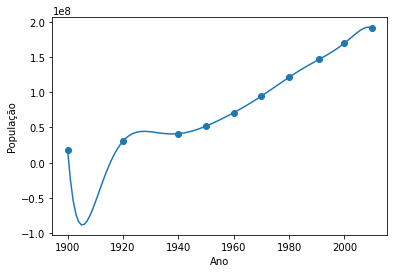

In [15]:
plt.scatter(x, y)
t = np.linspace(np.min(x), np.max(x), (np.max(x) - np.min(x) + 1))
plt.plot(t, Newton(t, alpha))

plt.xlabel("Ano")
plt.ylabel("População")
plt.show()

# Questão 3

Comente o resultado obtido na questão anterior.

O resultado aparenta ter sido calculado de forma coerente e de acordo com o método; uma vez que ele, de fato, interpola os dados $\left( \varphi (x_k) = y_k \; \forall k = 0, \ldots, n \right)$ conforme se nota pelo gráfico.

Contudo, é claro que a função ($\varphi (x)$) entre os nós de interpolação se afasta da realidade em alguns intervalos. Em especial, entre os pontos de valor $x=1900$ e $x=1920$, a população atingiu valor negativo, o que é impossível.

Logo, conclui-se que a interpolação polinomial por Método de Newton cumpre sua função ao interceptar os pontos que a geraram, mas não poderia ser utilizada com confiança para estimar os valores intermediários.